<a href="https://colab.research.google.com/github/Subhitsha123/Algorithim/blob/main/Tzu_Chi_data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SGO Data Tzu Chi SEEN@Bukit Batok (Mar 2025)_21.05.2025 (1).xls to SGO Data Tzu Chi SEEN@Bukit Batok (Mar 2025)_21.05.2025 (1).xls
Saving Members (cth.user).csv to Members (cth.user).csv
Saving Member Attendances Report (cth.member.attendance.report) (2).csv to Member Attendances Report (cth.member.attendance.report) (2).csv


In [2]:
import pandas as pd
activities_df = pd.read_csv("Member Attendances Report (cth.member.attendance.report) (2).csv")
members_df = pd.read_csv("Members (cth.user).csv")

In [4]:
sgo = pd.read_excel("SGO Data Tzu Chi SEEN@Bukit Batok (Mar 2025)_21.05.2025 (1).xls", engine='xlrd')

In [5]:

activities_df['Session Detail/Date'] = pd.to_datetime(activities_df['Session Detail/Date'], errors='coerce')

# Group by phone and get last session date
last_session = (
    activities_df
    .groupby('Phone')['Session Detail/Date']
    .max()
    .reset_index()
    .rename(columns={'Session Detail/Date': 'Last_Activity_Date'})
)


from datetime import datetime
last_session['Activity_Days_Inactive'] = (datetime.now() - last_session['Last_Activity_Date']).dt.days


final_df = pd.merge(members_df, sgo, on='NRIC', how='left')

final_df['Contact Number'] = pd.to_numeric(final_df['Contact Number'], errors='coerce').fillna(0).astype('int64')
last_session['Phone'] = pd.to_numeric(last_session['Phone'], errors='coerce').fillna(0).astype('int64')

final_df = pd.merge(
    final_df,
    last_session[['Phone', 'Activity_Days_Inactive']],
    left_on='Contact Number',
    right_on='Phone',
    how='left',
    indicator=True
)

final_df['Activity_Days_Inactive'] = final_df['Activity_Days_Inactive'].fillna(999).astype(int)


In [6]:
print(final_df['_merge'].value_counts())

_merge
left_only     3847
both          1564
right_only       0
Name: count, dtype: int64


In [7]:
final_df.head(10)

,Age,Centre (as client),CFS_x,Contact Number,Full Name,Is Client,Is interested to volunteer for the centre?,Is NOK?,Services,Within Boundary,...,Family or close friends report feeling overwhelmed by senior's illness.,"Living situation:Senior is a caregiver looking after someone who require high care needs (e.g. elderly who is main caregiver to someone who is ADL dependent, with behavioural issues, etc.)",Indication of low mood,Have you thought of harming yourself in the last 3 months?,Degree of loneliness,Has limited or no social interaction,What programmes would senior be interested in or want to see?,Phone,Activity_Days_Inactive,_merge
0,68.0,Tzu Chi SEEN @ Bukit Batok,1-3,91713243,Lim Guat Ngoo,No,No,No,Activities,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,left_only
1,74.0,Tzu Chi SEEN @ Bukit Batok,1-3,97527335,Tng Tian Choo,No,No,No,Activities,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,left_only
2,70.0,Tzu Chi SEEN @ Bukit Batok,1-3,90128201,Ng Suat Hiong,No,No,No,Activities,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,left_only
3,73.0,Tzu Chi SEEN @ Bukit Batok,1-3,97442856,Lim Bee Hong,No,No,No,Activities,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97442856.0,37,both
4,68.0,Tzu Chi SEEN @ Bukit Batok,1-3,97562973,Tan Suan Ngar,No,No,No,Activities,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,left_only
5,81.0,Tzu Chi SEEN @ Bukit Batok,NaN,83997090,Yap Soi Moy,No,No,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,left_only
6,67.0,Tzu Chi SEEN @ Bukit Batok,NaN,98634572,Sng Lin Lin,No,No,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,left_only
7,70.0,Tzu Chi SEEN @ Bukit Batok,NaN,96707945,Lee Guat Ngo,No,No,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96707945.0,1,both
8,58.0,Tzu Chi SEEN @ Bukit Batok,NaN,96570819,Ang Siew Hong Germain,No,Yes,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96570819.0,2,both
9,80.0,Tzu Chi SEEN @ Bukit Batok,NaN,96349582,Wee Shin,No,No,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,left_only


In [8]:
final_df = final_df[final_df['Centre (as client)'] == 'Tzu Chi SEEN @ Bukit Batok']
final_df = final_df[final_df['Within Boundary'] == 'Yes']

In [9]:
# final_df = final_df[final_df['Centre (as client)'] == 'Tzu Chi SEEN@Nanyang']

In [10]:
final_df = final_df[final_df['Full Name'].notna() & (final_df['Full Name'].str.strip() != '')]


In [11]:
print(final_df['_merge'].value_counts())

_merge
both          684
left_only     462
right_only      0
Name: count, dtype: int64


In [12]:
import numpy as np
import pandas as pd

def categorize_risk(row):
    # --- CFS ---
    cfs_raw = str(row.get('CFS_x', '')).strip()
    if cfs_raw == '1-3':
        cfs = 2
    elif cfs_raw == '4':
        cfs = 4
    elif cfs_raw == '5':
        cfs = 5
    elif cfs_raw == '6':
        cfs = 6
    elif cfs_raw == '7-8':
        cfs = 7
    else:
        cfs = np.nan

    # --- Social Risk Factor ---
    srf_raw = str(row.get('Social Risk Factor(s)', '')).strip()
    if srf_raw == '>1':
        srf = 2
    else:
        srf = pd.to_numeric(srf_raw, errors='coerce')

    # --- Fall Risk ---
    fall1 = str(row['Fall Risk - Fallen in last 6 months']).strip().lower() == 'yes'
    fall2 = str(row['Fall Risk - Unsteady or feel like falling']).strip().lower() == 'yes'
    fall_risk = fall1 or fall2

    # --- Housing Type ---
    housing = str(row.get('Housing Type', '')).strip().lower()

    # --- Days Inactive ---
    days_inactive = pd.to_numeric(row.get('Activity_Days_Inactive'), errors='coerce')

    # --- Marital Status ---
    marital_status = str(row.get('Marital Status', '')).strip().lower()
    alone = any(x in marital_status for x in ['single', 'widowed', 'divorced'])

    # --- Low Mood ---
    mood_raw = str(row.get('Indication of low mood', '')).strip().lower()
    low_mood = mood_raw == 'yes' or 'could not' in mood_raw

    # --- Suicidal Thoughts ---
    suicidal_thoughts = str(row.get('Have you thought of harming yourself in the last 3 months?', '')).strip().lower() == 'yes'

    # --- Degree of Loneliness ---
    loneliness_raw = str(row.get('Degree of loneliness', '')).strip().lower()
    loneliness_map = {
        'not': 0,
        'occasionally': 1,
        'frequently': 2,
        'daily': 3
    }
    loneliness = next((v for k, v in loneliness_map.items() if loneliness_raw.startswith(k)), np.nan)

    # --- Social Cutoff ---
    social_cutoff = str(row.get('Has limited or no social interaction', '')).strip().lower() == 'yes'

    # --- Instability of Conditions ---
    unstable_condition = str(row.get('Instability of Conditions - conditions that make cognitive, ADL, mood or behaviour patterns unstable (fluctuating, precarious or deteriorating)', '')).strip().lower() == 'yes'

    # --- Flags ---
    frail = pd.notna(cfs) and cfs >= 6
    mild_frail = pd.notna(cfs) and cfs in [4, 5]
    risky_srf = pd.notna(srf) and srf >= 1
    poor_housing = any(x in housing for x in ['1-rm', '2-rm', '3-rm'])
    inactive = pd.notna(days_inactive) and days_inactive > 30
    moderate_inactive = pd.notna(days_inactive) and days_inactive > 15

    # --- Risk Classification ---
    if (fall_risk or suicidal_thoughts or (pd.notna(loneliness) and loneliness >= 3 and low_mood and alone and frail)) and inactive and risky_srf:
        return 'R1'
    elif (frail or mild_frail) and (low_mood or risky_srf or unstable_condition or social_cutoff or fall_risk) and (alone or poor_housing) and moderate_inactive and srf >= 1:
        return 'R2'
    elif (frail or mild_frail or low_mood or risky_srf or social_cutoff or poor_housing or fall_risk) and moderate_inactive:
        return 'R3'
    else:
      return 'R4'


In [13]:
def compute_fall_risk(row):
    fall1 = str(row.get('Fall Risk - Fallen in last 6 months', '')).strip().lower() == 'yes'
    fall2 = str(row.get('Fall Risk - Unsteady or feel like falling', '')).strip().lower() == 'yes'
    return fall1 or fall2


In [14]:
final_df['Risk Level'] = final_df.apply(categorize_risk, axis=1)


In [15]:
final_df['Risk Level'].value_counts().reindex(['R1', 'R2', 'R3', 'R4']).fillna(0).astype(int)


,count
Risk Level,
R1,1
R2,2
R3,375
R4,768


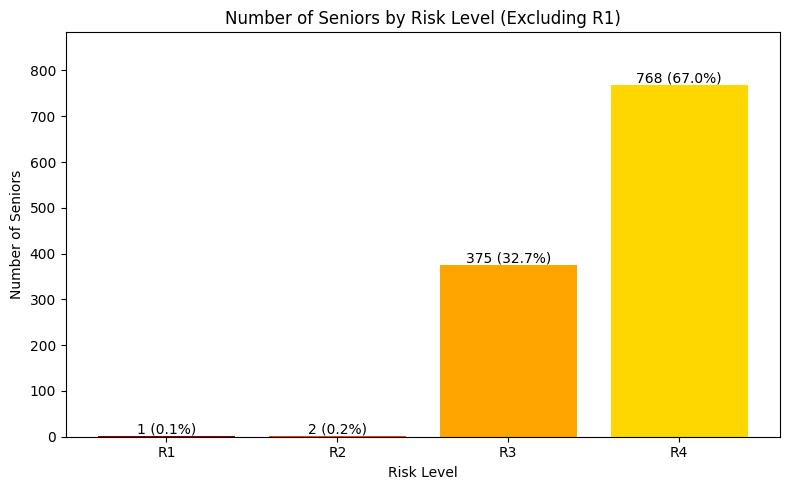

In [16]:
import matplotlib.pyplot as plt


risk_counts = {
    'R1': 1,
    'R2': 2,
    'R3': 375,
    'R4': 768
}


colors = {
    'R1': 'darkred',
    'R2': 'orangered',
    'R3': 'orange',
    'R4': 'gold'
}


total = sum(risk_counts.values())


plt.figure(figsize=(8, 5))
bars = plt.bar(risk_counts.keys(), risk_counts.values(), color=[colors[k] for k in risk_counts.keys()])
plt.title('Number of Seniors by Risk Level (Excluding R1)')
plt.xlabel('Risk Level')
plt.ylabel('Number of Seniors')
plt.ylim(0, max(risk_counts.values()) * 1.15)

for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    label = f"{int(height)} ({percent:.1f}%)"
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, label, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [17]:
df2 = final_df[final_df['Risk Level'] == 'R1']
df2

,Age,Centre (as client),CFS_x,Contact Number,Full Name,Is Client,Is interested to volunteer for the centre?,Is NOK?,Services,Within Boundary,...,"Living situation:Senior is a caregiver looking after someone who require high care needs (e.g. elderly who is main caregiver to someone who is ADL dependent, with behavioural issues, etc.)",Indication of low mood,Have you thought of harming yourself in the last 3 months?,Degree of loneliness,Has limited or no social interaction,What programmes would senior be interested in or want to see?,Phone,Activity_Days_Inactive,_merge,Risk Level
1211,61.0,Tzu Chi SEEN @ Bukit Batok,4,85803461,Segeran S/O Rajoo Krishna,Yes,No,No,Activities,Yes,...,No,No,NaN,Frequently (weekly but less than daily),Yes,Senior does not have hobbies,85803461.0,49,both,R1


In [18]:
print(final_df.columns.tolist())

['Age', 'Centre (as client)', 'CFS_x', 'Contact Number', 'Full Name', 'Is Client', 'Is interested to volunteer for the centre?', 'Is NOK?', 'Services', 'Within Boundary', 'NRIC', 'Housing Type', 'Last F2F Date', 'Last Measured Blood Pressure', 'Last Participation Date', 'Last Measured Weight', 'Marital Status', 'Social Risk Factor(s)', 'Activity Type', 'Date of Assessment/Visit', 'Name of AAC', 'Name of Senior', 'UIN', 'Senior GRC', 'Senior Division', 'Year of Birth', 'Gender', 'Ethnicity', 'Language spoken/understood', 'Number of Risk Factor(s)', 'Social Support Recommendation', 'CFS_y', 'AAP Recommendation', 'Postal Code', 'Block', 'Street Name', 'Floor', 'Unit Number', 'Working Status', 'Senior Contact Number', 'Contact Number of Next of Kin', 'Title of Next of Kin', 'Name of Next of Kin', 'Preferred day to call/visit', 'Preferred time to call/visit', 'Short term memory - recall 3 unrelated items (e.g. watch, table, apple) after 5 mins.', 'Cognitive skills for daily decision making'

In [19]:
final_df['fall_risk'] = final_df.apply(compute_fall_risk, axis=1)


In [20]:
columns_to_check = [
    'CFS_x',
    'Social Risk Factor(s)',
    'Housing Type',
    'Activity_Days_Inactive',
    'Marital Status',
    'Indication of low mood',
    'Have you thought of harming yourself in the last 3 months?',
    'Degree of loneliness',
    'Has limited or no social interaction',
    'Instability of Conditions - conditions that make cognitive, ADL, mood or behaviour patterns unstable (fluctuating, precarious or deteriorating)'
]

for col in columns_to_check:
    print(f"\n--- Unique values in '{col}' ---")
    print(final_df[col].dropna().unique())



--- Unique values in 'CFS_x' ---
['1-3' '5' '4' '6' '7-8']

--- Unique values in 'Social Risk Factor(s)' ---
['0' '1' '>1']

--- Unique values in 'Housing Type' ---
['4-RM HDB' '2-RM HDB' '3-RM HDB' '5-RM HDB' 'EXECUTIVE CONDOMINIUM'
 'CONDOMINIUM' 'LANDED PROPERTY']

--- Unique values in 'Activity_Days_Inactive' ---
[999   2   6  19  56  26  10  45   3  28   1  54  12  17  15   9   7  47
  21  30  59  61  20  27   8  23  62  24  36  49  38  13  35   5  64  34
  33  70  14  69  63  41  58  43  22  16  68  29  50  37  71  52  48]

--- Unique values in 'Marital Status' ---
['MARRIED' 'PARTNER/SIGNIFICANT OTHER' 'WIDOWED' 'SINGLE' 'DIVORCED'
 'SEPARATED']

--- Unique values in 'Indication of low mood' ---
['No' 'Senior could not (would not) respond' 'Yes']

--- Unique values in 'Have you thought of harming yourself in the last 3 months?' ---
['No']

--- Unique values in 'Degree of loneliness' ---
['Not lonely' 'Senior could not (would not) respond'
 'Occasionally (once in a while or irre

In [21]:
relevant_columns = [
    'Full Name',
    'CFS_x',
    'Social Risk Factor(s)',
    'Housing Type',
    'Activity_Days_Inactive',
    'Marital Status',
    'Indication of low mood',
    'Have you thought of harming yourself in the last 3 months?',
    'Degree of loneliness',
    'Has limited or no social interaction',
    'Instability of Conditions - conditions that make cognitive, ADL, mood or behaviour patterns unstable (fluctuating, precarious or deteriorating)',
    'fall_risk',
    'Risk Level'
]

display_df = final_df[relevant_columns]


In [22]:
display_df[display_df['Risk Level'] == 'R1']


,Full Name,CFS_x,Social Risk Factor(s),Housing Type,Activity_Days_Inactive,Marital Status,Indication of low mood,Have you thought of harming yourself in the last 3 months?,Degree of loneliness,Has limited or no social interaction,"Instability of Conditions - conditions that make cognitive, ADL, mood or behaviour patterns unstable (fluctuating, precarious or deteriorating)",fall_risk,Risk Level
1211,Segeran S/O Rajoo Krishna,4,1,3-RM HDB,49,DIVORCED,No,NaN,Frequently (weekly but less than daily),Yes,No,True,R1


In [23]:
display_df[display_df['Risk Level'] == 'R2']


,Full Name,CFS_x,Social Risk Factor(s),Housing Type,Activity_Days_Inactive,Marital Status,Indication of low mood,Have you thought of harming yourself in the last 3 months?,Degree of loneliness,Has limited or no social interaction,"Instability of Conditions - conditions that make cognitive, ADL, mood or behaviour patterns unstable (fluctuating, precarious or deteriorating)",fall_risk,Risk Level
1641,Jasman Bin Jalani,4,1,3-RM HDB,54,WIDOWED,NaN,NaN,NaN,NaN,NaN,False,R2
5150,Rahim Bin Man,5,1,3-RM HDB,35,DIVORCED,NaN,NaN,NaN,NaN,NaN,False,R2


In [24]:
display_df[display_df['Risk Level'] == 'R3'].head()


,Full Name,CFS_x,Social Risk Factor(s),Housing Type,Activity_Days_Inactive,Marital Status,Indication of low mood,Have you thought of harming yourself in the last 3 months?,Degree of loneliness,Has limited or no social interaction,"Instability of Conditions - conditions that make cognitive, ADL, mood or behaviour patterns unstable (fluctuating, precarious or deteriorating)",fall_risk,Risk Level
120,Mohamad Bin Kamis,5,0,2-RM HDB,19,MARRIED,No,NaN,Not lonely,No,No,True,R3
121,Soh Lay Har,5,0,3-RM HDB,999,MARRIED,No,NaN,Not lonely,No,No,True,R3
123,Cheong Lai Fun,1-3,0,2-RM HDB,56,MARRIED,No,NaN,Not lonely,No,No,False,R3
124,Manjeet Kaur D/O Gurcharan Singh,1-3,0,2-RM HDB,999,SINGLE,No,NaN,Not lonely,No,No,False,R3
125,Wang Bing Grace,NaN,0,2-RM HDB,999,MARRIED,NaN,NaN,NaN,NaN,NaN,False,R3


In [25]:
display_df[display_df['Risk Level'] == 'R4'].head()


,Full Name,CFS_x,Social Risk Factor(s),Housing Type,Activity_Days_Inactive,Marital Status,Indication of low mood,Have you thought of harming yourself in the last 3 months?,Degree of loneliness,Has limited or no social interaction,"Instability of Conditions - conditions that make cognitive, ADL, mood or behaviour patterns unstable (fluctuating, precarious or deteriorating)",fall_risk,Risk Level
55,Tan Gek Eng,NaN,0,4-RM HDB,999,MARRIED,NaN,NaN,NaN,NaN,NaN,False,R4
118,Leo Ah Tah,1-3,0,2-RM HDB,2,PARTNER/SIGNIFICANT OTHER,No,NaN,Not lonely,No,No,False,R4
119,Ong Sok Hian,5,0,2-RM HDB,6,WIDOWED,No,NaN,Not lonely,No,No,True,R4
122,Kew Cho Lin,1-3,0,3-RM HDB,2,MARRIED,No,NaN,Not lonely,No,No,False,R4
128,Tan Ah Swee,4,0,4-RM HDB,10,MARRIED,NaN,NaN,Not lonely,No,NaN,False,R4
